In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Checking for missing data

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot: >

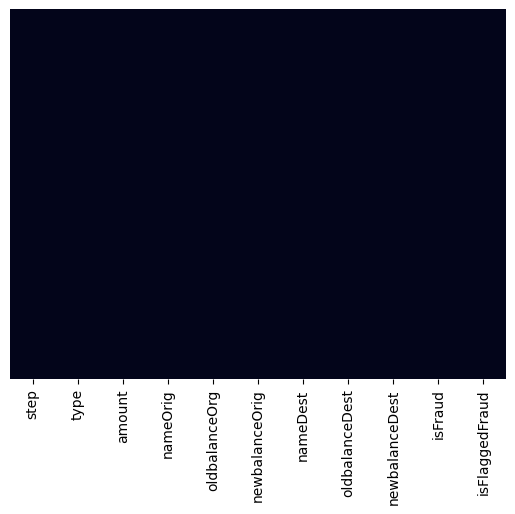

In [5]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

There were no any null values but in some numeric data missing values are represented as Zeros

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
columns_to_check =  ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [8]:
for column in columns_to_check:
    zeros_count = (df[column] == 0).sum()
    print(f"{column}: {zeros_count}")

amount: 16
oldbalanceOrg: 2102449
newbalanceOrig: 3609566
oldbalanceDest: 2704388
newbalanceDest: 2439433


In [9]:
df = df[(df[columns_to_check] != 0).all(axis=1)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350775 entries, 9 to 6362323
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1350775 non-null  int64  
 1   type            1350775 non-null  object 
 2   amount          1350775 non-null  float64
 3   nameOrig        1350775 non-null  object 
 4   oldbalanceOrg   1350775 non-null  float64
 5   newbalanceOrig  1350775 non-null  float64
 6   nameDest        1350775 non-null  object 
 7   oldbalanceDest  1350775 non-null  float64
 8   newbalanceDest  1350775 non-null  float64
 9   isFraud         1350775 non-null  int64  
 10  isFlaggedFraud  1350775 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 123.7+ MB


# Dectecting Outlier and removing them

Checking data is Guassian Distribution or not

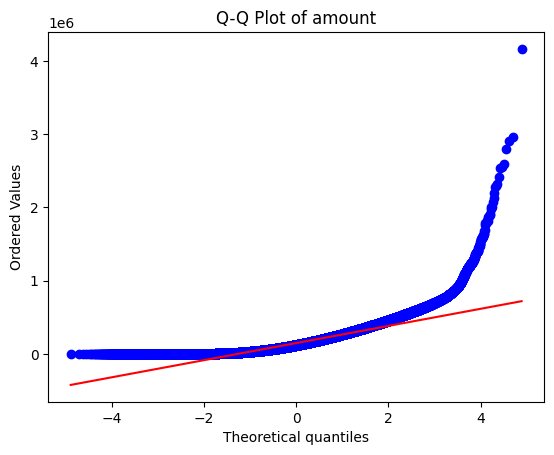

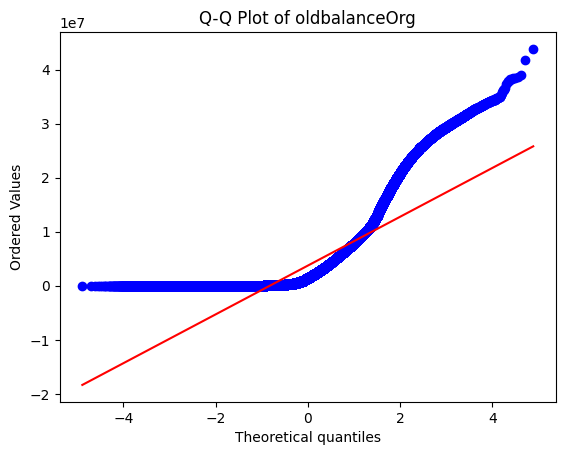

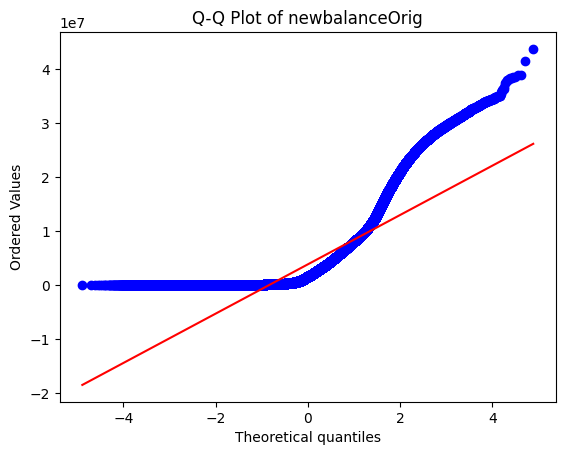

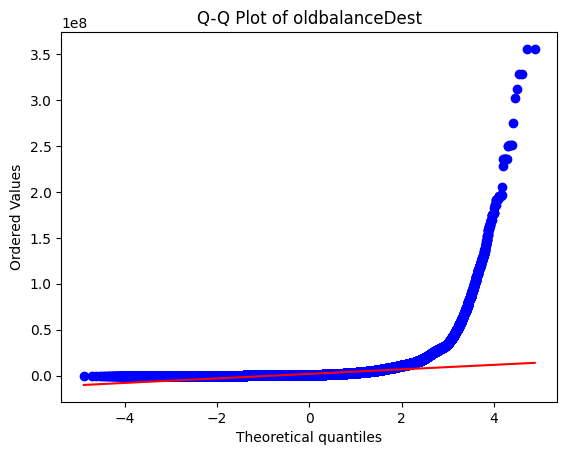

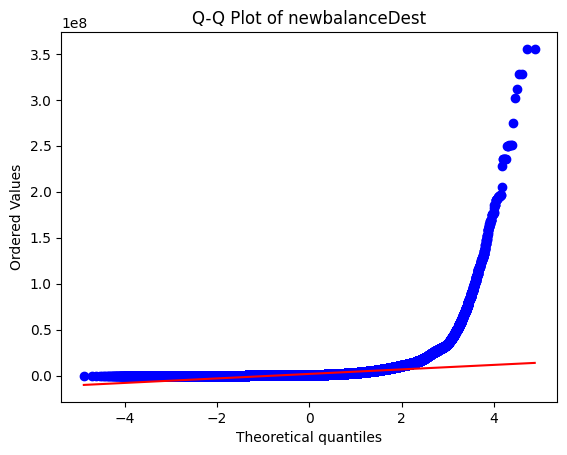

In [11]:
#Q-Q plot
for col in columns_to_check:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

The Data is not guassian distributed so we cant use simple methods like Standard deviation or Inquartile Range Method

Before removing outliers , we need to check multi-collinearity in data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350775 entries, 9 to 6362323
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1350775 non-null  int64  
 1   type            1350775 non-null  object 
 2   amount          1350775 non-null  float64
 3   nameOrig        1350775 non-null  object 
 4   oldbalanceOrg   1350775 non-null  float64
 5   newbalanceOrig  1350775 non-null  float64
 6   nameDest        1350775 non-null  object 
 7   oldbalanceDest  1350775 non-null  float64
 8   newbalanceDest  1350775 non-null  float64
 9   isFraud         1350775 non-null  int64  
 10  isFlaggedFraud  1350775 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 123.7+ MB


In [14]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

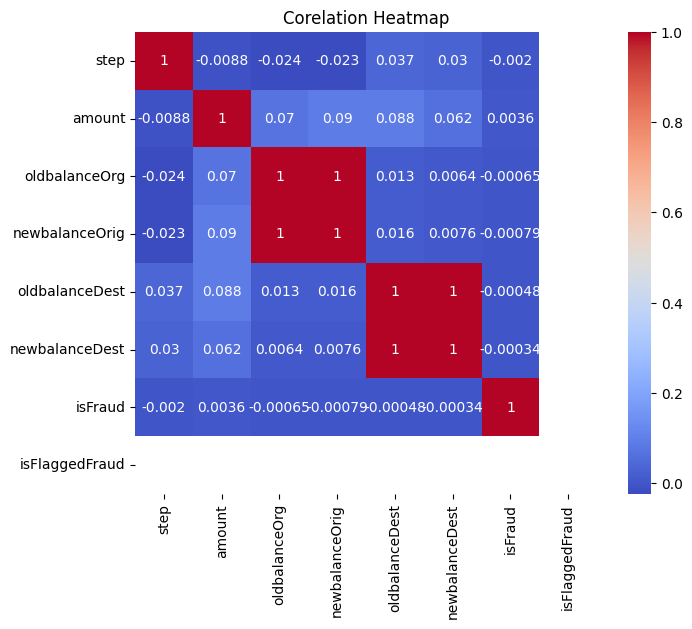

In [15]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix , annot=True , cmap = "coolwarm", square= True)
plt.title("Corelation Heatmap")
plt.show()

So , OldbalanceOrg and newbalanceOrig  , oldbalanceDest and newbalanceDest are corelated

Creating two new Columns 
1. AmountTransfedOrig : the total amount debitted from sending merchants bank account
2. AmountRecived : the total amount creditted to money receving merchants banck account

In [16]:
df['AmountTransfedOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df.drop(columns=['oldbalanceOrg','newbalanceOrig'] , inplace = True)

In [17]:
df['AmountRecived'] = df['newbalanceDest'] - df['oldbalanceDest']
df.drop(columns=['newbalanceDest','oldbalanceDest'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350775 entries, 9 to 6362323
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   step                1350775 non-null  int64  
 1   type                1350775 non-null  object 
 2   amount              1350775 non-null  float64
 3   nameOrig            1350775 non-null  object 
 4   nameDest            1350775 non-null  object 
 5   isFraud             1350775 non-null  int64  
 6   isFlaggedFraud      1350775 non-null  int64  
 7   AmountTransfedOrig  1350775 non-null  float64
 8   AmountRecived       1350775 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 103.1+ MB


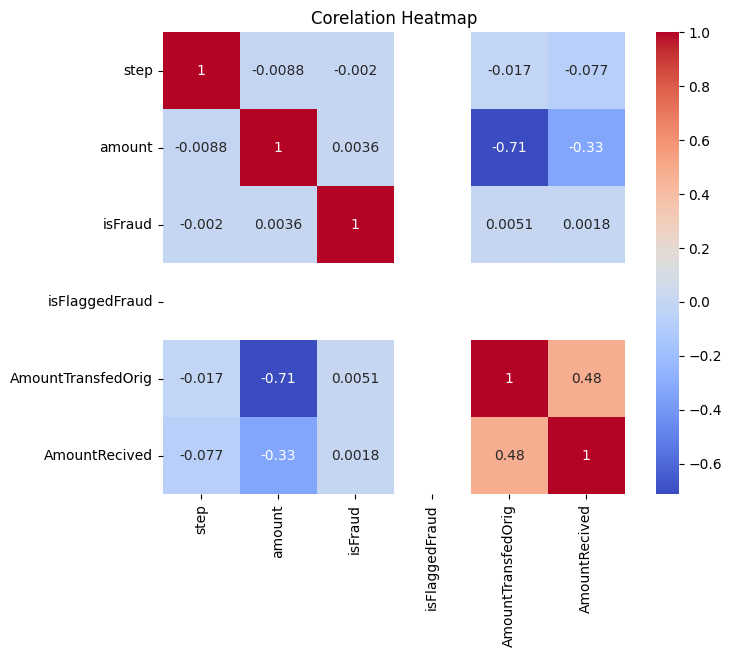

In [19]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix , annot=True , cmap = "coolwarm", square= True)
plt.title("Corelation Heatmap")
plt.show()

In [22]:
df['isFlaggedFraud'].unique()

array([0], dtype=int64)

Dropping isFlaggedFraud

In [23]:
df.drop(columns=['isFlaggedFraud'], inplace = True)

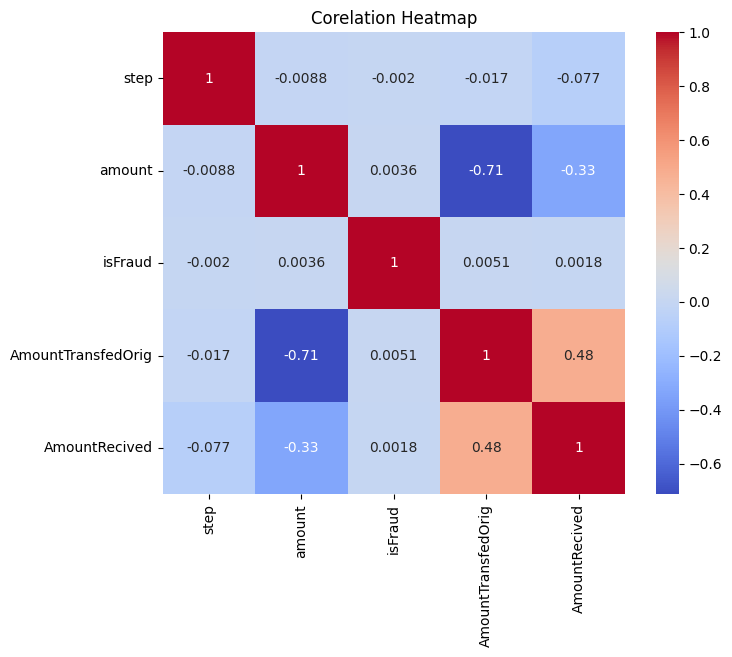

In [24]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix , annot=True , cmap = "coolwarm", square= True)
plt.title("Corelation Heatmap")
plt.show()

In [26]:
len(df['nameDest'].unique())

372704

In [27]:
len(df['nameOrig'].unique())

1350347

Droping nameOrig , nameDest because of object data having huge number of unique values
Droping Step because of very little corelated to data

In [28]:
df.drop(columns = ['nameDest','nameOrig','step'] , inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350775 entries, 9 to 6362323
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   type                1350775 non-null  object 
 1   amount              1350775 non-null  float64
 2   isFraud             1350775 non-null  int64  
 3   AmountTransfedOrig  1350775 non-null  float64
 4   AmountRecived       1350775 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 61.8+ MB


# Removing Outliers 

OneHotEncoding categorical data

In [32]:
features = df.drop(columns=['isFraud'])
target = df['isFraud']

In [35]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
categorical_transformer = Pipeline(steps=[
    ('onehot' , OneHotEncoder())
])

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat' , categorical_transformer , ['type'])
    ],
    remainder='passthrough'
)

In [ ]:
features = preprocessor.fit_transform(features)

In [40]:
lof = LocalOutlierFactor()
xhat = lof.fit_predict(features)

In [41]:
xhat

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
mask = xhat != -1

In [44]:
x , y = features[mask, :],target[mask]

In [45]:
x.shape , y.shape

((1347036, 7), (1347036,))

Splitting data into train and test set

In [46]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.25 , random_state=42)

In [47]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((1010277, 7), (336759, 7), (1010277,), (336759,))

# Model Training 

Im using a RandomForestClassifier because of this is a classification problem and Random forest is a Ensemble model that combines multiple Decision Trees using bagging(Bootstrap Aggregating) technique . The majority vote among all the trees determines the final prediction.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

Using default vairable of RandomForestClassifier

In [49]:
model = RandomForestClassifier(n_estimators = 100 , random_state=42)

# Normalizing data before training

to stop data-leakage from test set which reduces generalization , so doing Normalization for both test and train sets seperatly is best

In [52]:
mean_train = np.mean(xtrain, axis=0)
std_train = np.std(xtrain, axis=0)
mean_test = np.mean(xtest, axis=0)
std_test = np.std(xtest, axis=0)

In [53]:
xtrain = (xtrain-mean_train)/std_train
xtest = (xtest-mean_test)/std_test

# Training 

In [54]:
model.fit(xtrain , ytrain)

RandomForestClassifier(random_state=42)

In [55]:
ypred  = model.predict(xtest)

In [56]:
accuracy = accuracy_score(ytest , ypred)

In [57]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [58]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    336759

    accuracy                           1.00    336759
   macro avg       1.00      1.00      1.00    336759
weighted avg       1.00      1.00      1.00    336759

